### Data visualization

In [134]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [135]:
import seaborn as sns

sns.set_theme()
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("tab20b")

palette='tab20b'
primary_color = sns.color_palette('tab20b')[0]
title_fontsize = '25'

In [136]:
image_folder_path = '../images/aculei-images/'
csv_path = '../datasets/aculei.csv'

In [137]:
df = pd.read_csv(csv_path, index_col=0)

In [138]:
df['camera'].value_counts()

CAM_1    9076
CAM_4    2764
CAM_6    1559
CAM_5    1139
CAM_3     995
CAM_7     367
CAM_2     188
Name: camera, dtype: int64

In [139]:
# sorting a lil bit
df.sort_values('date', inplace=True)
df.sort_values('camera', inplace=True)

In [140]:
# modifying date_time column dtype
df['date_time'] = pd.to_datetime(df['date_time'])

### Some insigths about the data

In [141]:
df.shape

(16874, 7)

In [142]:
df.sample(5)

image_name camera           date_time        date  \
6490   TF_ACULEI_16015_DSCF0297.jpg    NaN 2023-06-01 22:09:56  2023-06-01   
5285   TF_ACULEI_13539_DSCF0290.jpg  CAM_6 2023-01-18 18:18:04  2023-01-18   
4546    TF_ACULEI_8123_DSCF0212.jpg  CAM_1 2021-07-22 23:17:03  2021-07-22   
10214  TF_ACULEI_13467_IMAG0125.jpg    NaN 2023-01-16 04:00:07  2023-01-16   
13182   TF_ACULEI_2948_DSCF2998.jpg  CAM_1 2021-06-10 21:47:58  2021-06-10   

           time             moon  temp  
6490   22:09:56        Full Moon  12°C  
5285   18:18:04  Waning Crescent   1°C  
4546   23:17:03        Full Moon  25°C  
10214  04:00:07     Last Quarter   NaN  
13182  21:47:58         New Moon   NaN

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16874 entries, 16083 to 16622
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   image_name  16874 non-null  object        
 1   camera      16088 non-null  object        
 2   date_time   16862 non-null  datetime64[ns]
 3   date        16862 non-null  object        
 4   time        16862 non-null  object        
 5   moon        16862 non-null  object        
 6   temp        10457 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 1.0+ MB


In [144]:
print('Null values\n')
print(df.isnull().sum())

Null values

image_name       0
camera         786
date_time       12
date            12
time            12
moon            12
temp          6417
dtype: int64


In [145]:
print('Unique cameras\n')
print(df['camera'].value_counts())

Unique cameras

CAM_1    9076
CAM_4    2764
CAM_6    1559
CAM_5    1139
CAM_3     995
CAM_7     367
CAM_2     188
Name: camera, dtype: int64


In [146]:
print('Time period\n')

min = df['date_time'].min()
max = df['date_time'].max()

print(f'Min date: {min}\nMax date: {max}')

Time period

Min date: 2021-01-03 22:21:33
Max date: 2023-09-28 01:00:12


In [147]:
print('Moon phases recorded\n')
print(df['moon'].value_counts())

Moon phases recorded

Full Moon          2704
First Quarter      2620
Waxing Gibbous     2125
Waning Crescent    2052
Waning Gibbous     2045
Last Quarter       1873
New Moon           1774
Waxing Crescent    1669
Name: moon, dtype: int64


### Data visualization

In [148]:
# adding info to plot easier
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')
df['year'] = df['date'].dt.to_period('Y')
df['day'] = df['date'].dt.to_period('d')

In [149]:
df.head()

image_name camera           date_time       date  \
16083  TF_ACULEI_7960_DSCF0049.jpg  CAM_1 2021-07-22 22:51:38 2021-07-22   
13884  TF_ACULEI_6234_DSCF6577.jpg  CAM_1 2021-06-25 00:33:51 2021-06-25   
13947  TF_ACULEI_6256_DSCF6599.jpg  CAM_1 2021-06-25 00:38:36 2021-06-25   
12896  TF_ACULEI_6274_DSCF6617.jpg  CAM_1 2021-06-25 00:41:45 2021-06-25   
2655   TF_ACULEI_6250_DSCF6593.jpg  CAM_1 2021-06-25 00:37:30 2021-06-25   

           time       moon  temp    month  year         day  
16083  22:51:38  Full Moon  95°C  2021-07  2021  2021-07-22  
13884  00:33:51  Full Moon   NaN  2021-06  2021  2021-06-25  
13947  00:38:36  Full Moon  22°C  2021-06  2021  2021-06-25  
12896  00:41:45  Full Moon   NaN  2021-06  2021  2021-06-25  
2655   00:37:30  Full Moon  22°C  2021-06  2021  2021-06-25

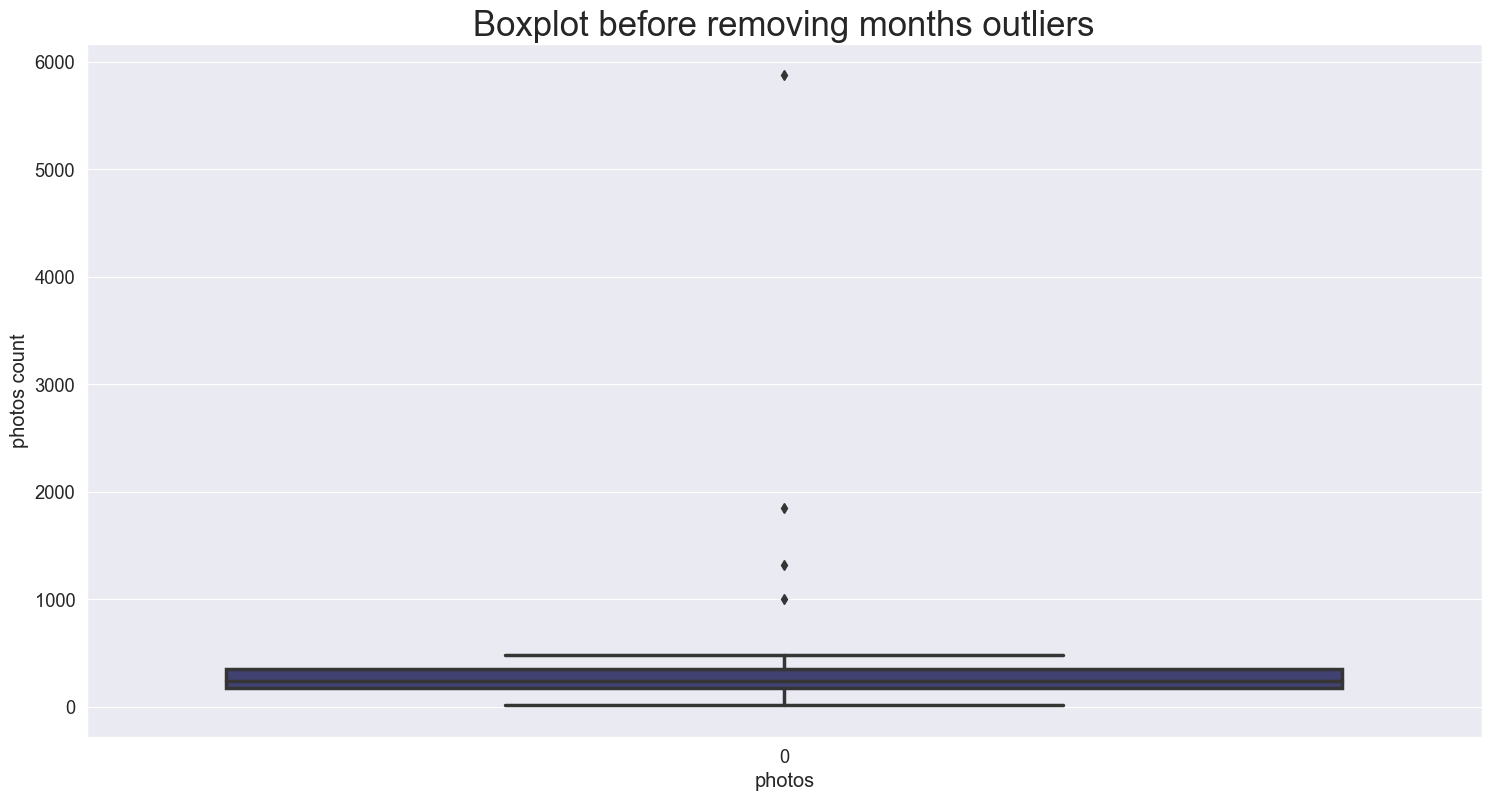

In [150]:
photos_per_month = df.groupby(['month']).size().reset_index(name='photos')
photos_per_month['month'] = photos_per_month['month'].apply(lambda x: str(x)) 

plt.figure(figsize=(18, 9))
ax = sns.boxplot(photos_per_month['photos'], color=primary_color)
plt.title('Boxplot before removing months outliers', fontsize=title_fontsize)
plt.ylabel('photos count')
plt.xlabel('photos')
plt.show()

In [151]:
# remove outliers ? 
df = df[df['month'] != '2021-06'].copy()
df = df[df['month'] != '2021-05'].copy()
df = df[df['month'] != '2021-07'].copy()
df = df[df['month'] != '2023-01'].copy()

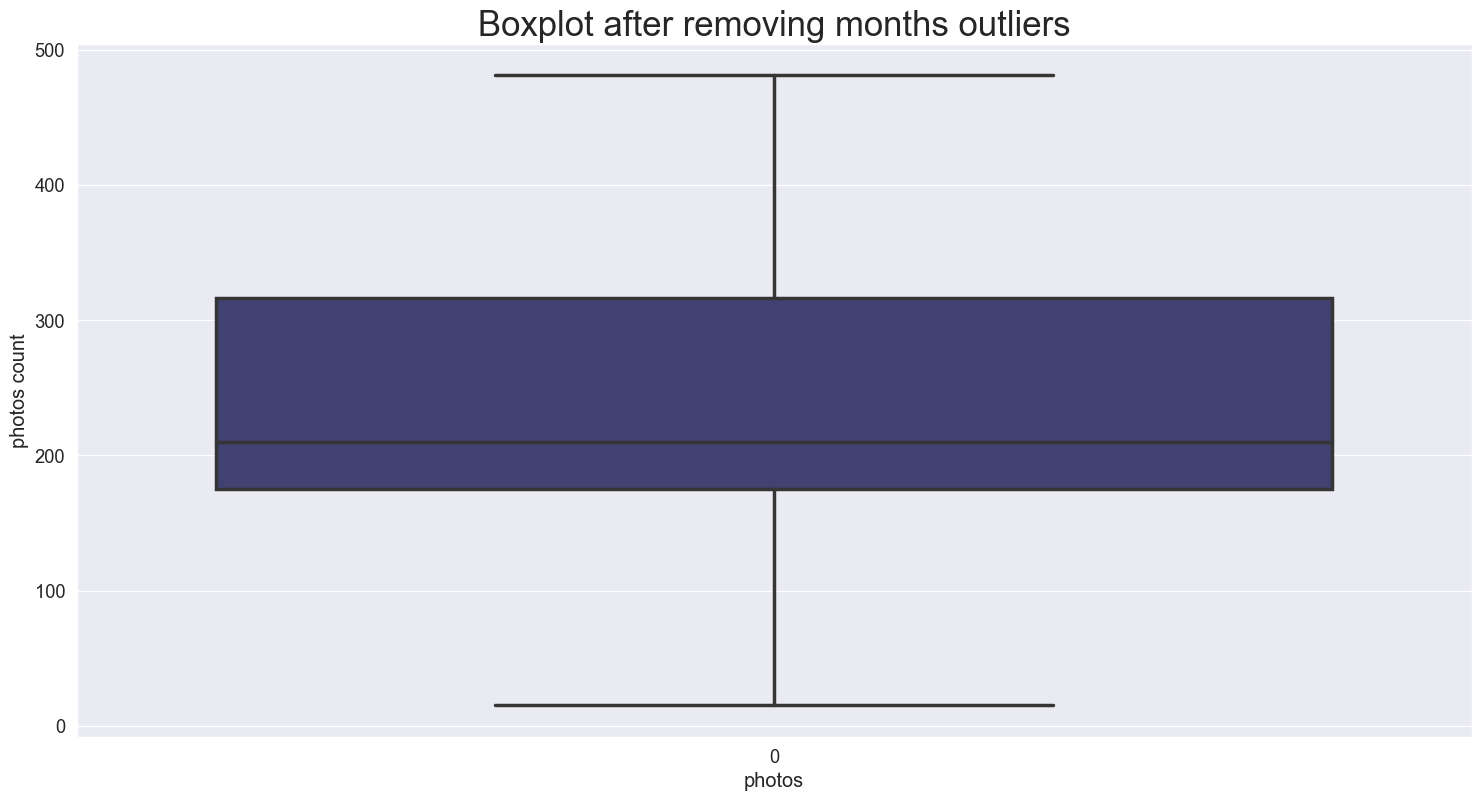

In [152]:
photos_per_month = df.groupby(['month']).size().reset_index(name='photos')
photos_per_month['month'] = photos_per_month['month'].apply(lambda x: str(x)) 

plt.figure(figsize=(18, 9))
ax = sns.boxplot(photos_per_month['photos'], color=primary_color)
plt.title('Boxplot after removing months outliers', fontsize=title_fontsize)
plt.ylabel('photos count')
plt.xlabel('photos')
plt.show()

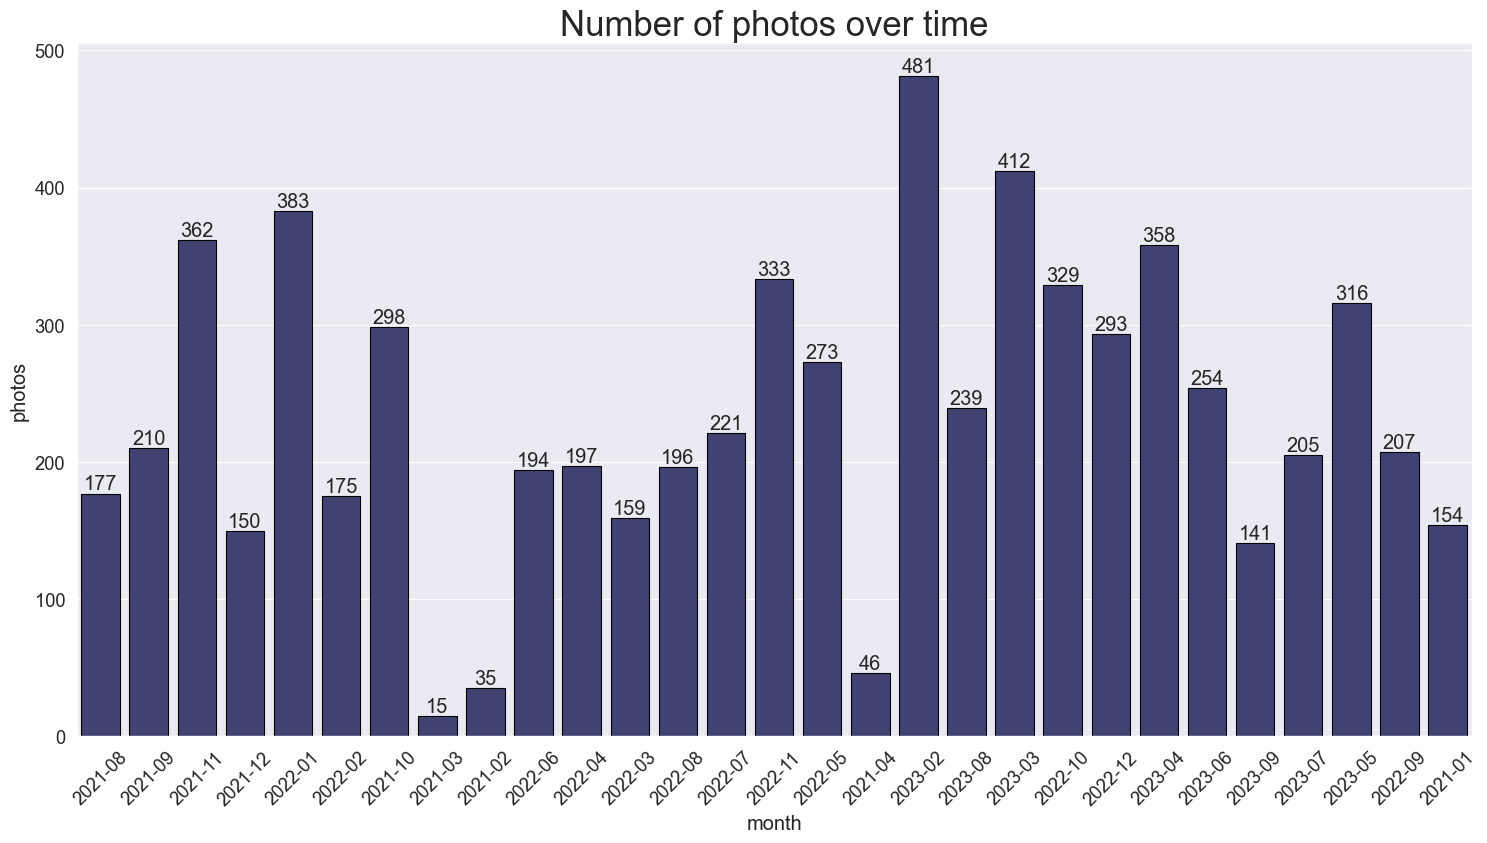

In [153]:
plt.figure(figsize=(18, 9))
ax = sns.countplot(data=df, x='month', ec='black', color=primary_color)

plt.title('Number of photos over time', fontsize=title_fontsize)
plt.ylabel('photos')
plt.xlabel('month')
plt.xticks(rotation=45)

ax.bar_label(ax.containers[0])
plt.show()

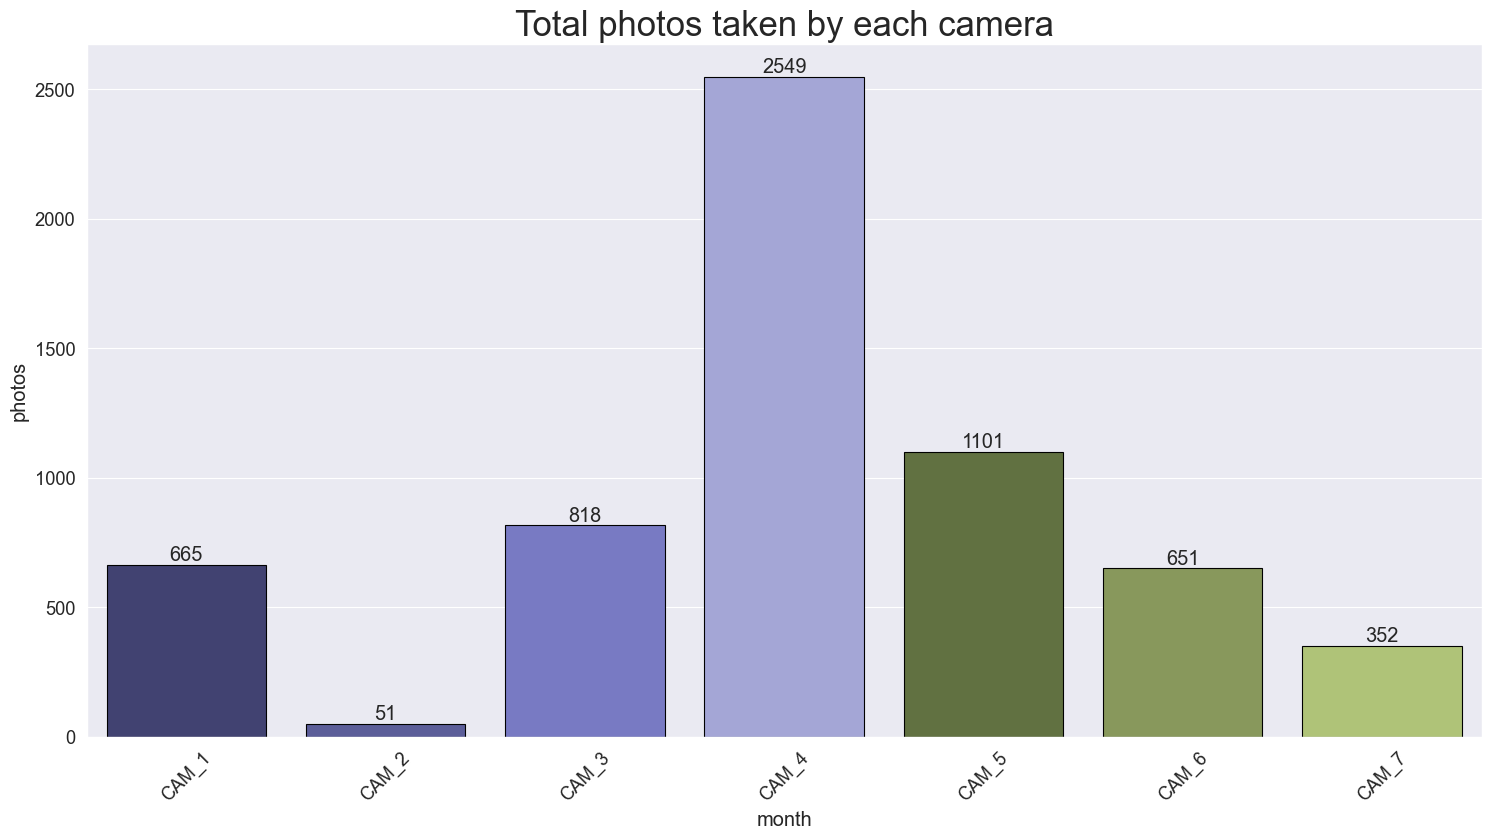

In [154]:
plt.figure(figsize=(18, 9))

ax = sns.countplot(data=df, x='camera', ec='black')

plt.title('Total photos taken by each camera', fontsize=title_fontsize)
plt.ylabel('photos')
plt.xlabel('month')
plt.xticks(rotation=45)

ax.bar_label(ax.containers[0])
plt.show()

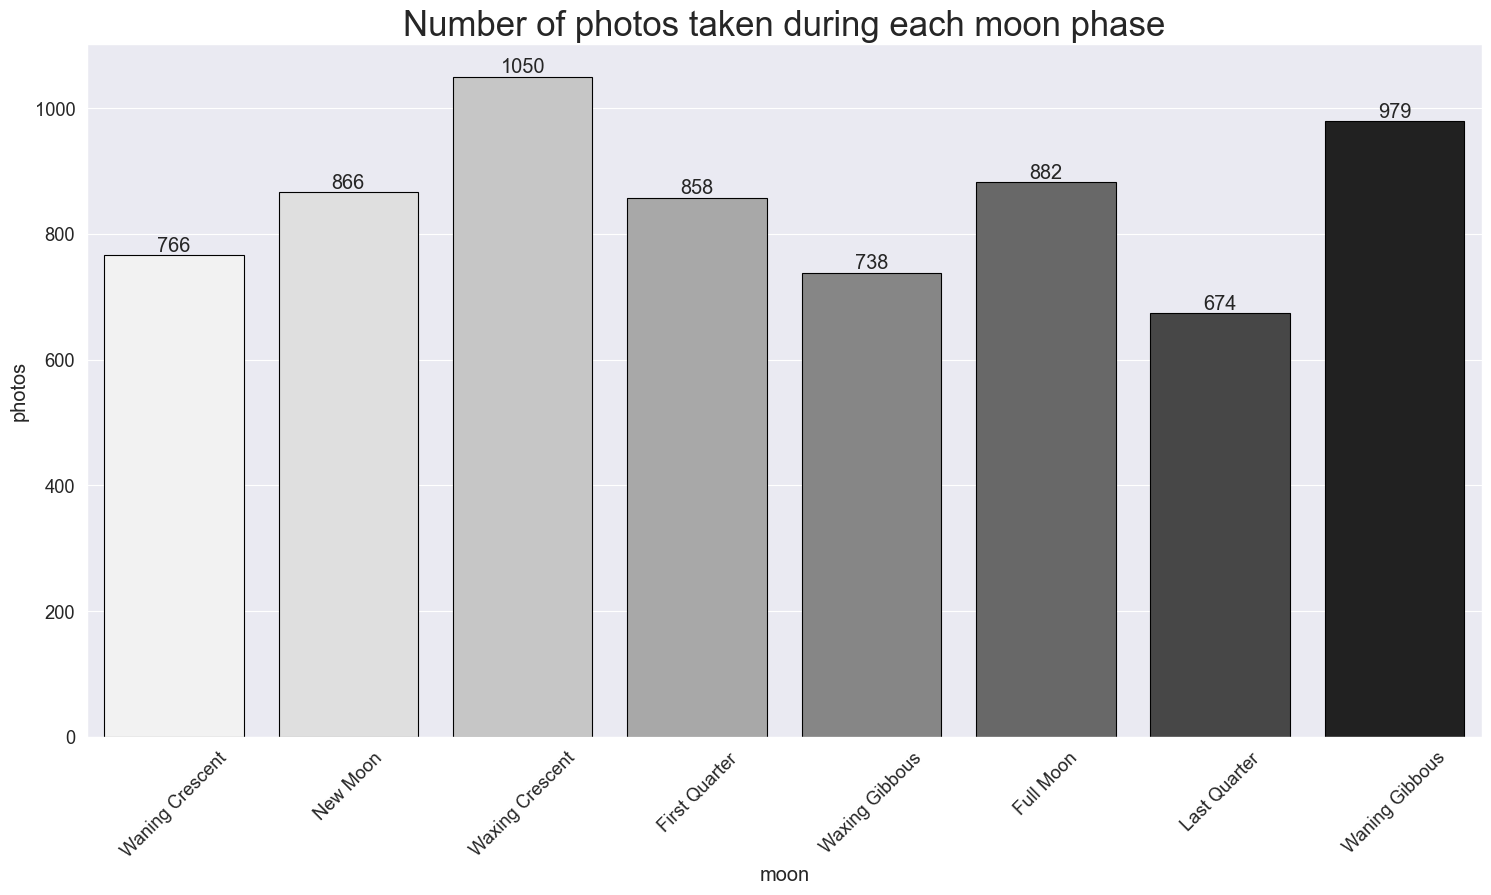

In [155]:
plt.figure(figsize=(18, 9))

ax = sns.countplot(data=df, x='moon', palette='Greys', ec='black')

plt.title('Number of photos taken during each moon phase', fontsize=title_fontsize)
plt.ylabel('photos')
plt.xlabel('moon')
plt.xticks(rotation=45)

ax.bar_label(ax.containers[0])
plt.show()

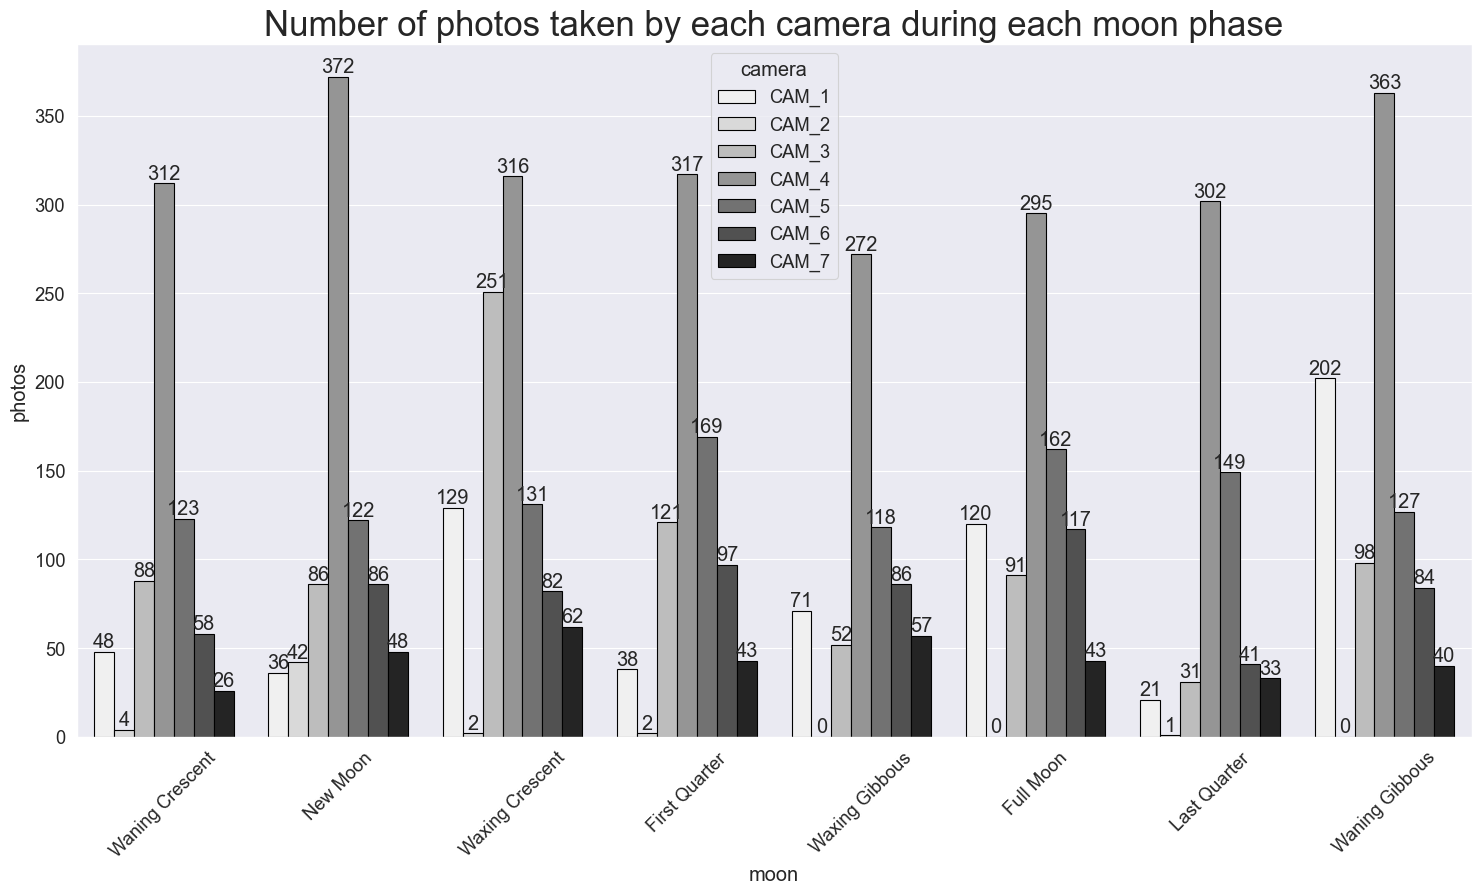

In [156]:
plt.figure(figsize=(18, 9))
ax = sns.countplot(data=df, x='moon', hue='camera', palette='Greys', ec='black')

plt.title('Number of photos taken by each camera during each moon phase', fontsize=title_fontsize)
plt.ylabel('photos')
plt.xlabel('moon')
plt.xticks(rotation=45)

for i in range(0, 7):
    ax.bar_label(ax.containers[i])

plt.show()

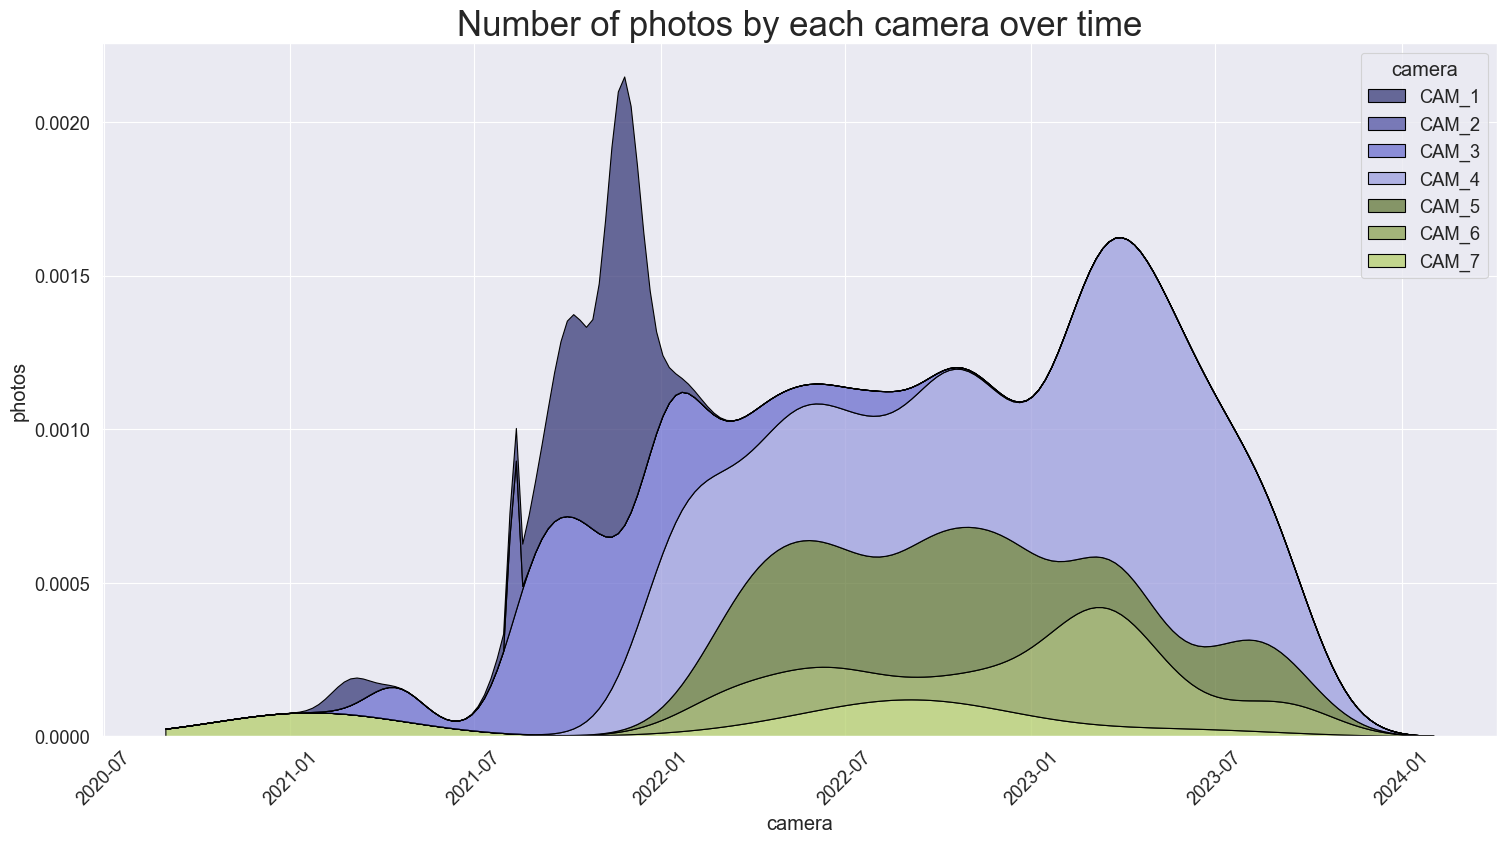

In [157]:
plt.figure(figsize=(18, 9))
sns.kdeplot(data=df, x="date_time", hue="camera", multiple="stack", ec='black')

plt.title('Number of photos by each camera over time', fontsize=title_fontsize)
plt.ylabel('photos')
plt.xlabel('camera')
plt.xticks(rotation=45)

plt.show()

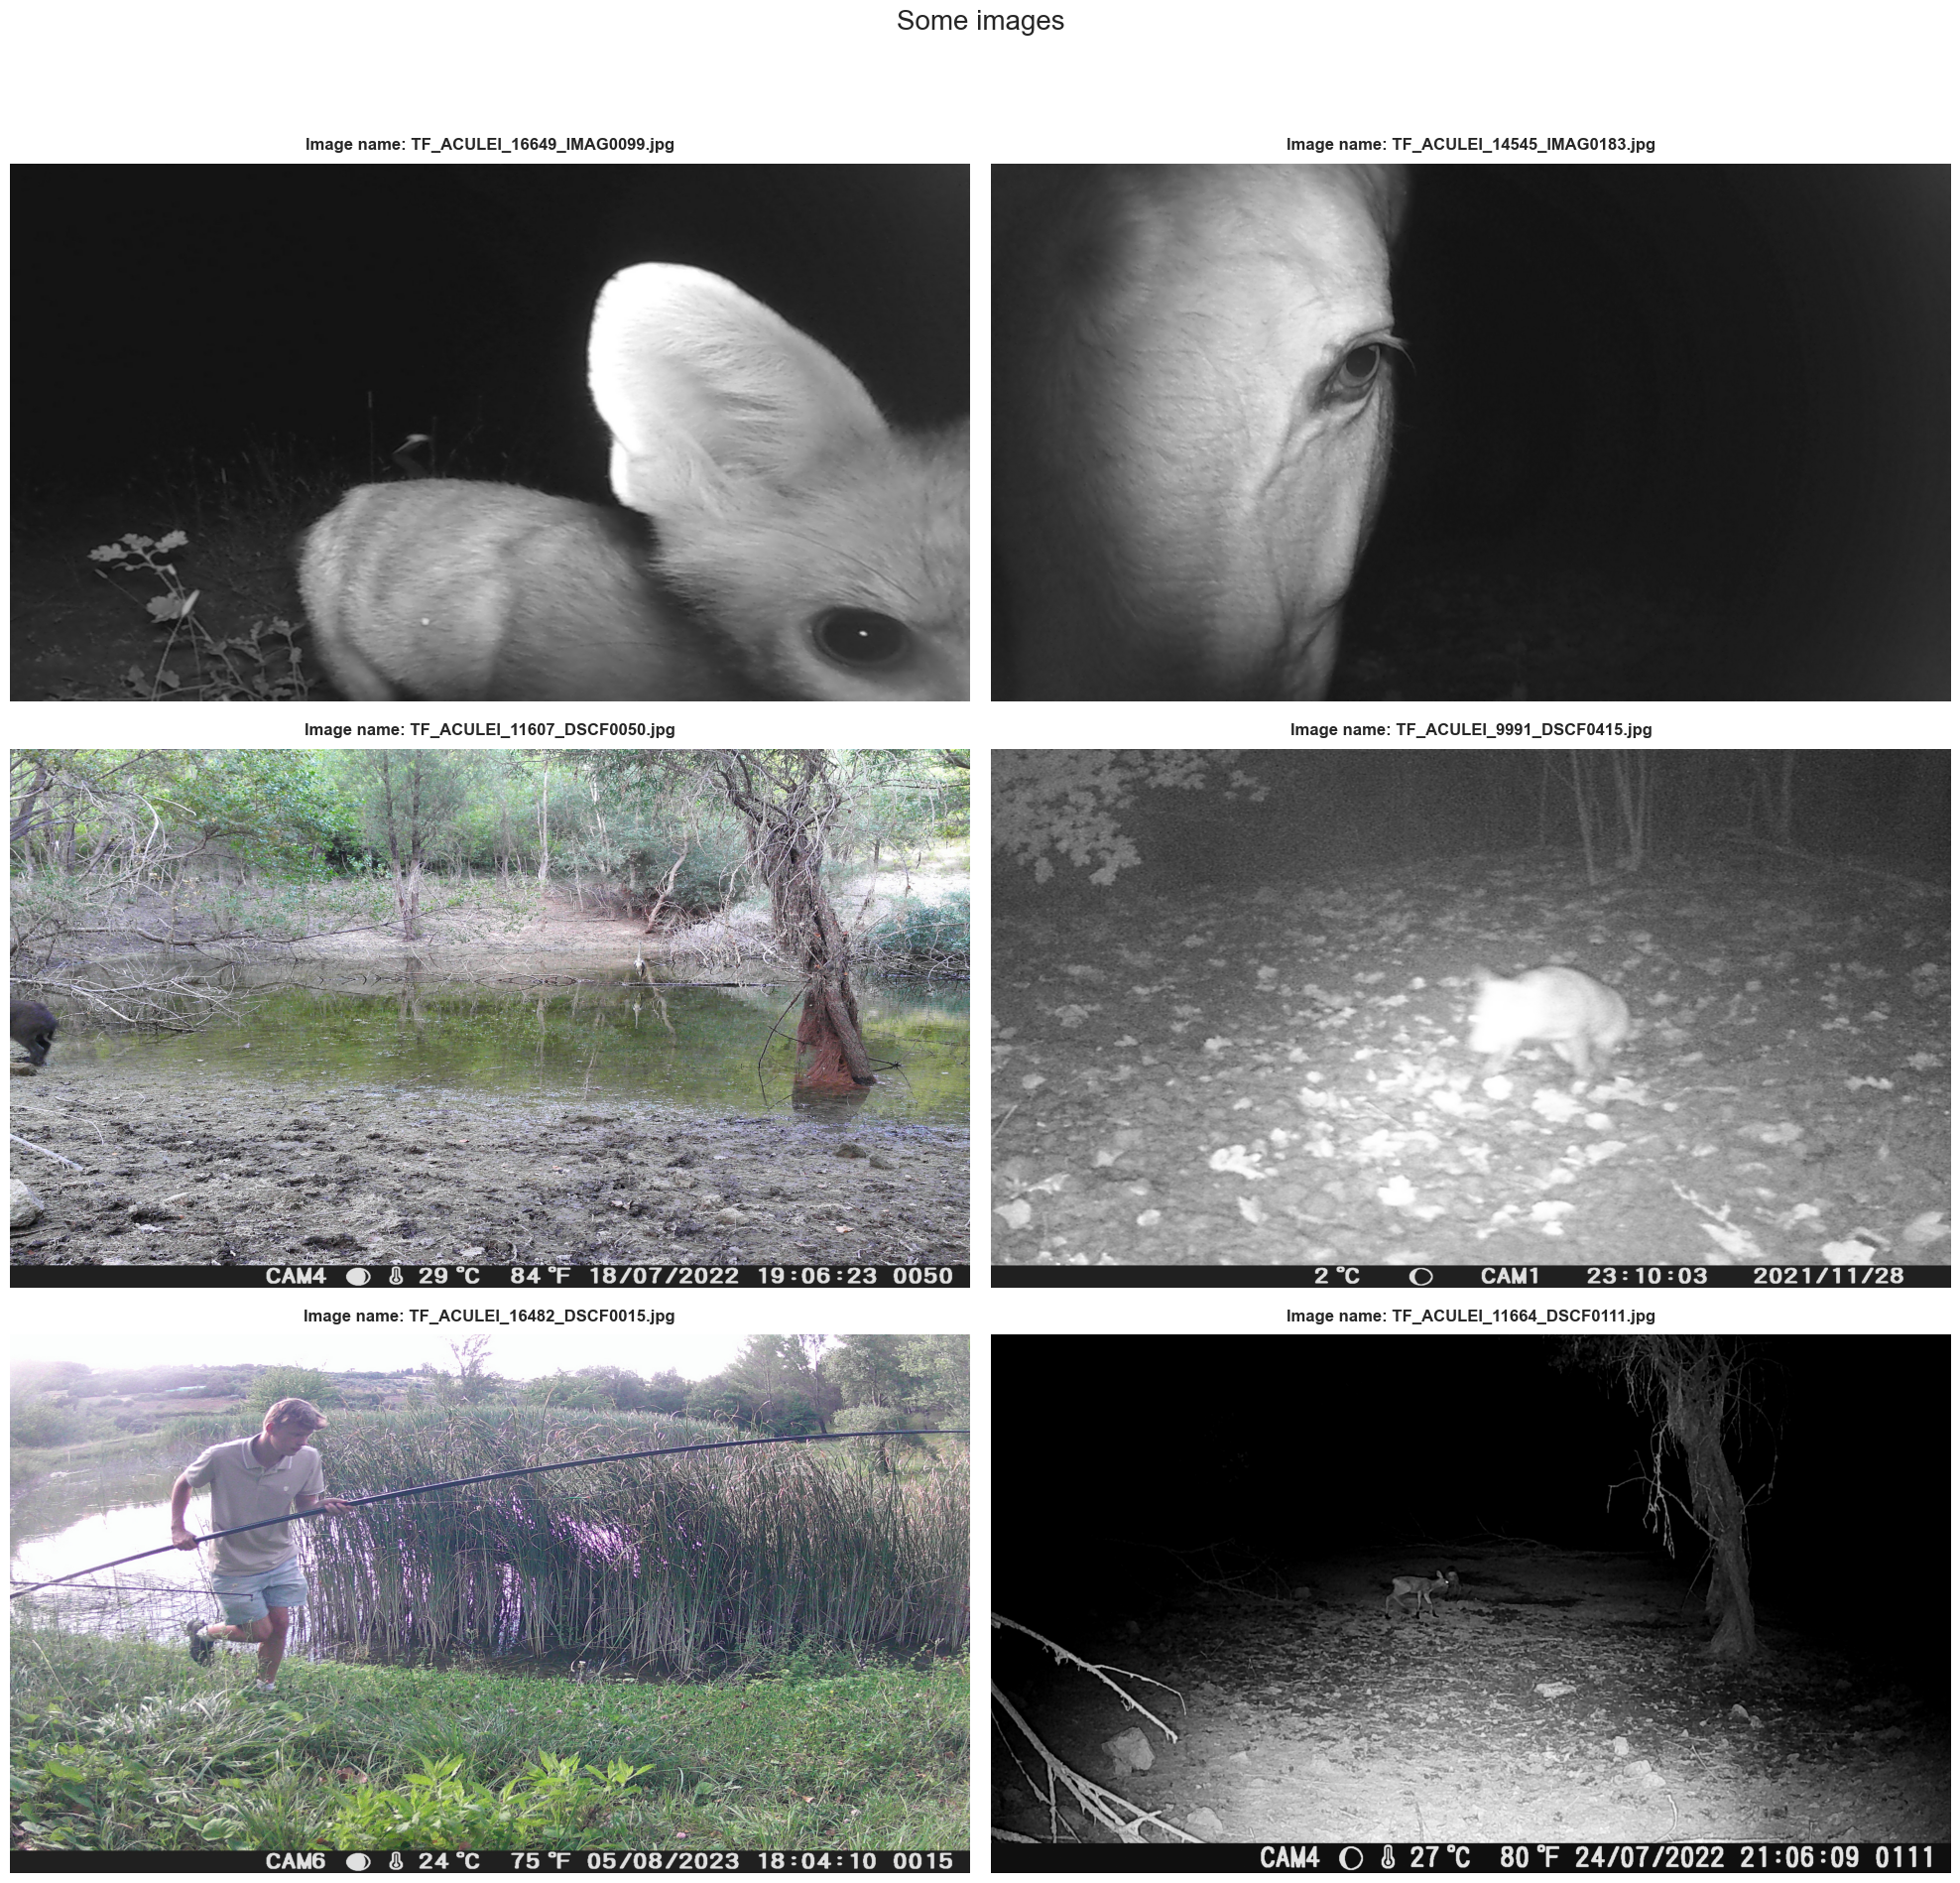

In [158]:
valid_rows = df.sample(6)

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20, 20))
fig.suptitle('Some images', fontsize=20)

axes = [ax1, ax2, ax3, ax4, ax5, ax6]
    
for i, ax in enumerate(axes):
    image_path = os.path.join(image_folder_path, valid_rows.iloc[i]['image_name'])
    image = Image.open(image_path)
    ax.imshow(image, aspect='auto')
    ax.axis('off')

    image_name = valid_rows.iloc[i]['image_name']
    ax.set_title(f"Image name: {image_name}", fontsize=12, fontweight='bold', pad=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()